# Task 1

Code for packages which are going to be used in this coursework. 

In [ ]:
import numpy as np
import pandas as pd
import scipy 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

The following codes imports the data using pandas.

In [ ]:
climb_data=pd.read_csv('climbing_statistics.csv')
rain_data=pd.read_csv('Rainier_Weather.csv')
test_data=pd.read_csv('test_set.csv')


### 1.1.1-Cleaning the data 

The following code shows first few lines of data, to give us an idea of what we are dealing with.

In [ ]:
climb_data.head()

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0


The following code shows what routes there are. 

In [ ]:
climb_data['Route'].unique()

array(['Disappointment Cleaver', 'Little Tahoma', 'Kautz Glacier',
       'Emmons-Winthrop', 'glacier only - no summit attempt',
       'Fuhrers Finger', 'Success Cleaver', 'Liberty RIngraham Directge',
       'Kautz Cleaver', 'Tahoma Glacier', 'Ptarmigan RIngraham Directge',
       'Mowich Face', 'Ingraham Direct', 'Sunset RIngraham Directge',
       'Curtis RIngraham Directge', 'Tahoma Cleaver', 'Gibralter Ledges',
       'Nisqually Glacier', 'Wilson Headwall', 'Gibralter Chute',
       "Fuhrer's Finger", 'Unknown', 'Edmonds HW', 'Sunset Amphitheater',
       'Kautz Headwall', 'Liberty Wall'], dtype=object)

As we can see there are routes "Fuhrer's Finger" and 'Fuhrers Finger', these are meant to be the same. The following code puts them under one name Fuhrer's Finger. It also deletes all 'Unknown' routes and Success Percentages (which are recalulculated at a later date).

In [ ]:
climb_1 = climb_data.drop(['Success Percentage'],axis=1)
climb_1.loc[climb_1.Route=='Fuhrers Finger',"Route"]="Fuhrer's Finger"
climb_2 = climb_1[climb_1['Route'] != "Unknown"]

Recalculates 'Success Percentage' and gets rid of bad data i.e ‘success percentage’ above 100.

In [ ]:
#aware of error message but the code still works.
climb_2a=climb_2
climb_2a['Success Percentage']=climb_2['Succeeded']/climb_2['Attempted']*100

c:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#get rid of bad data
climb_3 = climb_2a[climb_2a['Success Percentage']<=100]

Groups by date and Route, summing attempts and success. Also recalculates 'success percentage' so it is correct

In [ ]:
climb_4=climb_3.groupby(['Route','Date'],as_index=False)['Attempted','Succeeded'].sum()

#recaluculate success percentage so it is correct
climb_4['Success Percentage']=climb_4['Succeeded']/climb_4['Attempted']*100

Shows what Rain data looks like.

In [ ]:
rain_data.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,12/31/2015,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,12/30/2015,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,12/29/2015,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,12/28/2015,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,12/27/2015,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708


### 1.1.2

Clearly Battery voltage is not needed. Following code gets ride of it.

In [ ]:
rain_1 = rain_data.drop(['Battery Voltage AVG'],axis=1)

### 1.1.3

We now merge both cleaned sets of data into Final_data.

In [ ]:
final_data=pd.merge(climb_4, rain_1, on='Date')

We now check the the final data is good. 

In [ ]:
final_data.isnull().sum()

Route                    0
Date                     0
Attempted                0
Succeeded                0
Success Percentage       0
Temperature AVG          0
Relative Humidity AVG    0
Wind Speed Daily AVG     0
Wind Direction AVG       0
Solar Radiation AVG      0
dtype: int64

In [ ]:
final_data.head()


,Route,Date,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
0,Curtis RIngraham Directge,5/29/2015,2,0,0.000000,36.655,71.65125,24.686333,274.766667,245.295917
1,Disappointment Cleaver,5/29/2015,63,40,63.492063,36.655,71.65125,24.686333,274.766667,245.295917
2,Fuhrer's Finger,5/29/2015,2,2,100.000000,36.655,71.65125,24.686333,274.766667,245.295917
3,Kautz Glacier,5/29/2015,2,2,100.000000,36.655,71.65125,24.686333,274.766667,245.295917
4,Liberty RIngraham Directge,5/29/2015,4,0,0.000000,36.655,71.65125,24.686333,274.766667,245.295917


In [ ]:
final_data.describe(include='all')

,Route,Date,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
count,482,482,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
unique,20,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Disappointment Cleaver,6/6/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,178,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,21.018672,10.085062,37.342823,37.840669,50.253037,11.703446,166.225117,217.562860
std,NaN,NaN,26.103059,15.806227,37.906084,9.720376,23.451563,10.844174,88.454238,134.776715
min,NaN,NaN,1.000000,0.000000,0.000000,6.834833,12.363500,0.000000,13.490000,0.000000
25%,NaN,NaN,3.000000,0.000000,0.000000,31.411250,30.904833,4.607219,92.601896,44.960000
50%,NaN,NaN,9.000000,2.000000,33.493590,37.577083,48.226667,7.999708,191.560875,248.050792
75%,NaN,NaN,33.000000,16.000000,67.121212,46.228750,69.774167,14.657875,243.762500,337.990417


We have gone from over 4000 entries to a data set of 400, not ideal but enough to do reasonable analysis. 

### 1.2.1-Visualising the data

The following code convert dates into a built in python dates format so they can be plotted onto a graph using built in Matplotlib functionality. This was a lot tidier then when producing the graphs using my own linerized data and visually you cannot tell the difference between the two with the actual data.  

In [ ]:
final_data_time=final_data
final_data_time['Date'] = pd.to_datetime(final_data_time['Date'])

The following code generates the desired graphs; Attempts, Succeeded, Success Percentage all vs time. 

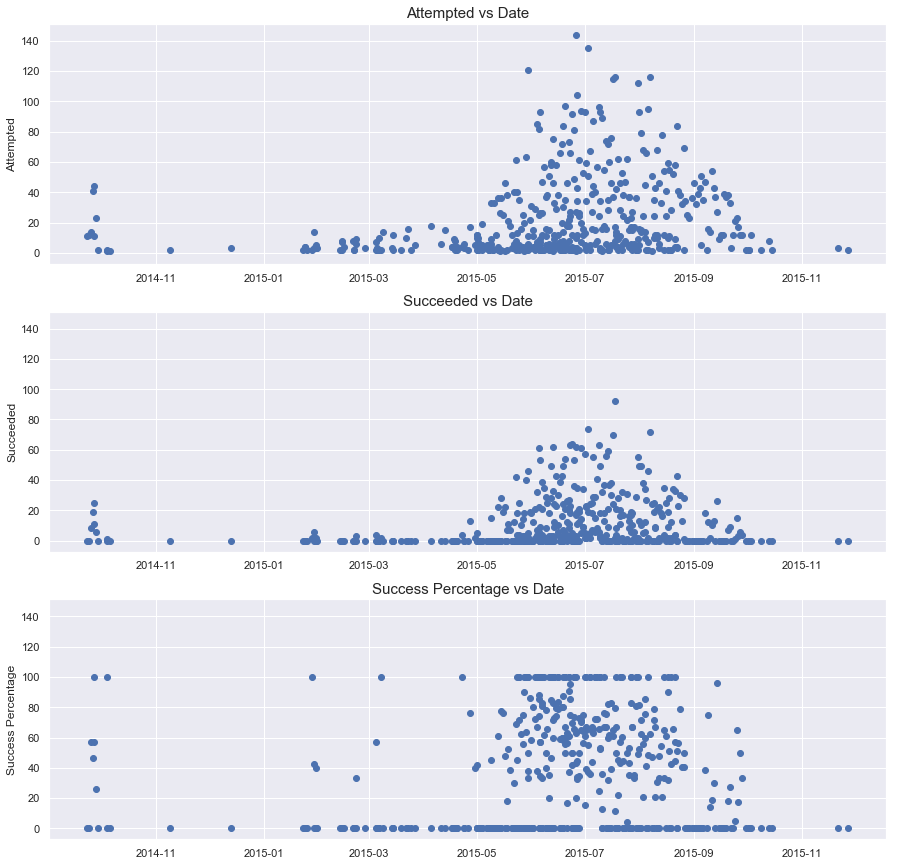

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, figsize =(15,15))
ax1.plot_date(final_data_time['Date'],final_data_time['Attempted'],xdate=True)
ax1.set_title('Attempted vs Date',fontsize=15)
ax1.set_ylabel('Attempted')
ax2.plot_date(final_data_time['Date'],final_data_time['Succeeded'],xdate=True)
ax2.set_title('Succeeded vs Date',fontsize=15)
ax2.set_ylabel('Succeeded')
ax3.plot_date(final_data_time['Date'],final_data_time['Success Percentage'],xdate=True)
ax3.set_title('Success Percentage vs Date',fontsize=15)
ax3.set_ylabel('Success Percentage')
plt.show()

As expected, we can see a correlation between attempted and succeeded, with frequency of succeed being lower, representing failed climbs. Interestingly most of the data is from the end of Summer and the first 2 months of Autumn, with the busiest time appearing to be September (see high number attempts and density of dots in Attempted Scatterplot).

### 1.2.2

The following code generates the figure below.

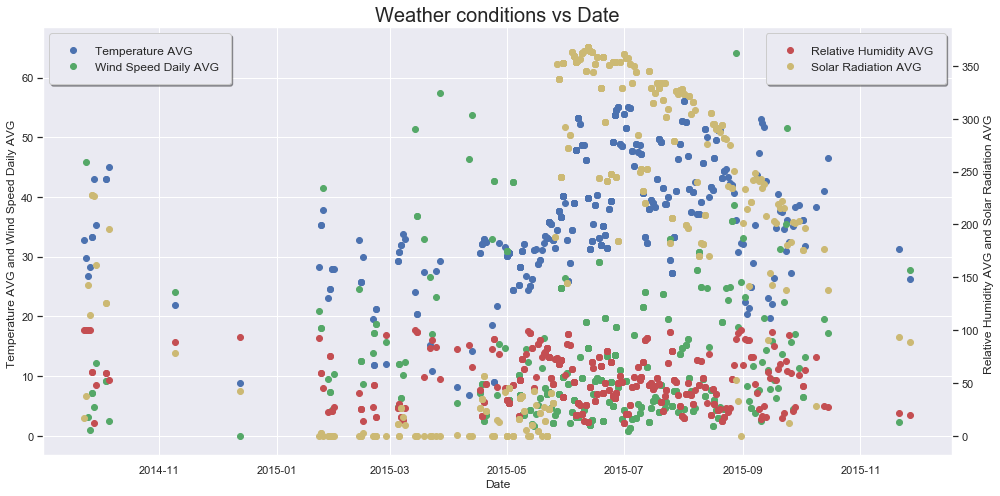

In [ ]:
fig, ax1 = plt.subplots(figsize =(14,7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature AVG and Wind Speed Daily AVG ')
ax1.plot_date(final_data_time['Date'],final_data_time['Temperature AVG'],xdate=True,color='b',label="Temperature AVG")
ax1.plot_date(final_data_time['Date'],final_data_time['Wind Speed Daily AVG'],xdate=True,color='g',label="Wind Speed Daily AVG")


ax1.tick_params(axis='y')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Relative Humidity AVG and Solar Radiation AVG ')  # we already handled the x-label with ax1
ax2.plot_date(final_data_time['Date'],final_data_time['Relative Humidity AVG'],xdate=True,color='r',label="Relative Humidity AVG")
ax2.plot_date(final_data_time['Date'],final_data_time['Solar Radiation AVG'],xdate=True,color='y',label="Solar Radiation AVG")
ax2.tick_params(axis='y')



plt.title('Weather conditions vs Date',fontsize=20)
ax1.legend(loc="upper left", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax2.legend(loc="upper right", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.grid(b=None) 
plt.show()

As we can there is correlation between Temperature and Solar radiation which makes sense, they also peak at the end of Summer. Humidity Wind speed seems relatively random throughout the year.

### 1.2.3

The code below produces histogram figures for the weather conditions.

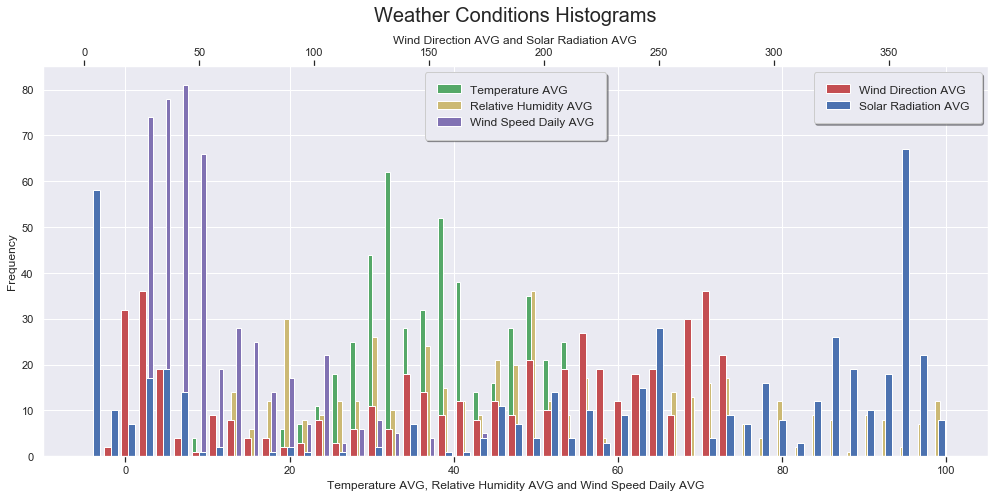

In [ ]:
fig, ax1 = plt.subplots(figsize =(14,7))


x1=final_data_time['Temperature AVG']
x2=final_data_time['Relative Humidity AVG']
x3=final_data_time['Wind Speed Daily AVG']
x4=final_data_time['Wind Direction AVG']
x5=final_data_time['Solar Radiation AVG']
bins1 = np.linspace(-5, 100, 50)
bins2 = np.linspace(0, 375, 50)




ax1.hist([x1, x2, x3], bins1, label=['Temperature AVG', 'Relative Humidity AVG','Wind Speed Daily AVG'],color=['g','y','m'])
ax1.set_xlabel('Temperature AVG, Relative Humidity AVG and Wind Speed Daily AVG')
ax1.set_ylabel('Frequency')



ax2 = ax1.twiny()
ax2.hist([x4, x5], bins2, label=['Wind Direction AVG', 'Solar Radiation AVG'],color=['r','b'])
ax2.set_xlabel('Wind Direction AVG and Solar Radiation AVG')

ax1.legend(loc="upper center", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax2.legend(loc="upper right", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Weather Conditions Histograms', y=1.10, fontsize=20)
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.grid(b=None) 
plt.show()

### 1.3-Visualising relationship between desciptors

The following code shows relationships between all the variables. 

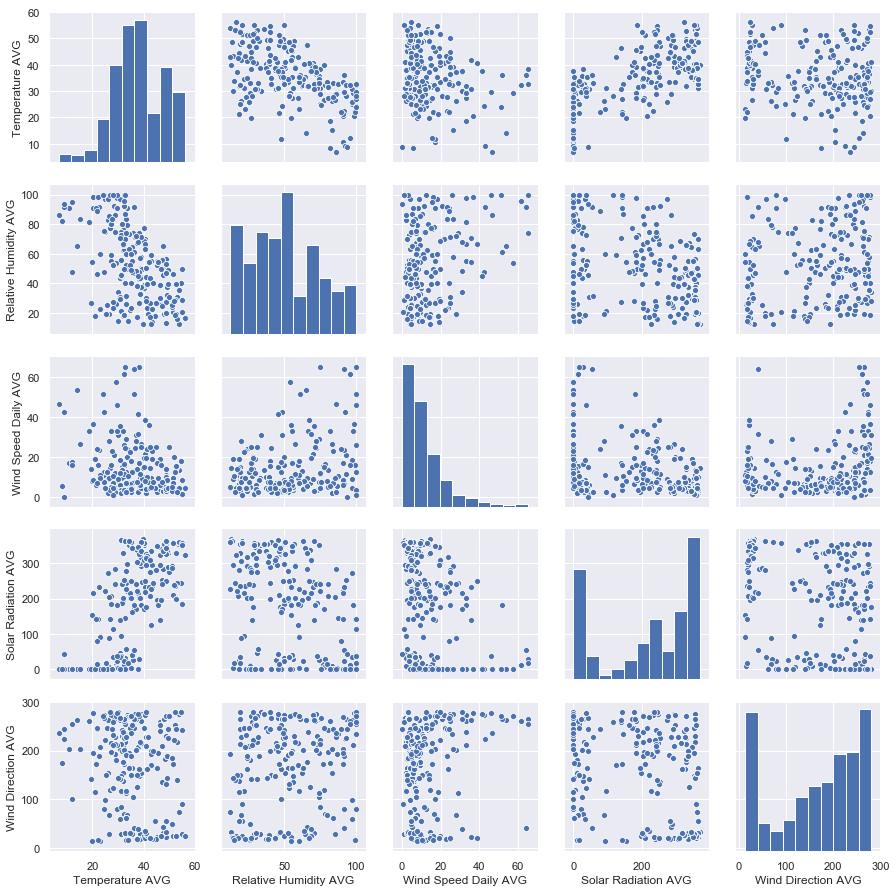

In [ ]:
weather_data=final_data_time[['Temperature AVG','Relative Humidity AVG','Wind Speed Daily AVG','Solar Radiation AVG','Wind Direction AVG' ]]
sns.pairplot(weather_data);

Humidity and temperature seem correlated, as do temperature and solar radiation. So its probably not very beneficial to use all three as predictors, when doing the regression. Interestingly wind direction and speed are relatively uncorrelated. It would perhaps be best to use wind speed, wind direction, relative humidity and Solar radiation as predictors, we omit temperature as it information is included in Solar radiation and humidity. This is reineforced by the fact the corraltion between Temperature AVG and Solar Radiation AVG is has a correlation coefficient of 0.655 which is quite strong (not above 0.8 which is ideal). The Correlation Coefficient  scores are shown below, Humidity and Tempreture is also not too bad with Correlation Coefficient value of 0.53. 

In [ ]:
print(final_data_time[['Temperature AVG','Relative Humidity AVG','Wind Speed Daily AVG','Solar Radiation AVG','Wind Direction AVG' ]].corr())

                       Temperature AVG  Relative Humidity AVG  \
Temperature AVG               1.000000              -0.530341   
Relative Humidity AVG        -0.530341               1.000000   
Wind Speed Daily AVG         -0.242209               0.248363   
Solar Radiation AVG           0.655159              -0.346683   
Wind Direction AVG           -0.122717               0.192485   

                       Wind Speed Daily AVG  Solar Radiation AVG  \
Temperature AVG                   -0.242209             0.655159   
Relative Humidity AVG              0.248363            -0.346683   
Wind Speed Daily AVG               1.000000            -0.295691   
Solar Radiation AVG               -0.295691             1.000000   
Wind Direction AVG                 0.221075            -0.201000   

                       Wind Direction AVG  
Temperature AVG                 -0.122717  
Relative Humidity AVG            0.192485  
Wind Speed Daily AVG             0.221075  
Solar Radiation AVG     

### 1.4 Splitting the data into training and validation sets 

The following code makes a function, which as its inputs takes data and a sample size. It output a split of the data, a training set and validation set of size 'sample size'. It does this using random numbers and the data's indexing, as a result it is well sampled.

In [ ]:
def samplesplitter(clean_data,sample_size):
    clean_data.reset_index()
    sample_data=np.random.choice(clean_data.index,sample_size,replace=False)
    train_data=clean_data.drop(sample_data)
    test_data=clean_data.drop(train_data.index)
    return train_data,test_data


The following code splits the data with a 96 size validation sample (approximately 20%)

In [ ]:
final_train_data,final_val_data=samplesplitter(final_data_time,95)
print(final_val_data)

                                Route       Date  Attempted  Succeeded  \
0           Curtis RIngraham Directge 2015-05-29          2          0   
23             Disappointment Cleaver 2015-10-09          2          0   
30             Disappointment Cleaver 2015-03-27          5          0   
35             Disappointment Cleaver 2015-03-09         14          0   
36             Disappointment Cleaver 2015-04-13         15          0   
37             Disappointment Cleaver 2015-04-17          4          0   
39             Disappointment Cleaver 2015-04-18          9          0   
53             Disappointment Cleaver 2015-05-11         33          0   
56                    Emmons-Winthrop 2015-05-13          4          0   
59                      Little Tahoma 2015-05-14          1          0   
62             Disappointment Cleaver 2015-05-16         25         19   
66                      Kautz Glacier 2015-05-18          2          0   
71                    Ingraham Direct 

Visually we can see that the validation data is well sampled and of the right size.

# Task 2

### 2.1.1 Linear Regression

The following code splits up predictors and target, as we can see it is giving us the correct results.

In [ ]:
x_train=final_train_data[['Temperature AVG','Relative Humidity AVG','Wind Speed Daily AVG','Solar Radiation AVG' ]]
x_test=final_val_data[['Temperature AVG','Relative Humidity AVG','Wind Speed Daily AVG','Solar Radiation AVG' ]]
y_train=final_train_data['Success Percentage']
y_test=final_val_data['Success Percentage']
x_train.head()

,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Solar Radiation AVG
1,36.655,71.65125,24.686333,245.295917
2,36.655,71.65125,24.686333,245.295917
3,36.655,71.65125,24.686333,245.295917
4,36.655,71.65125,24.686333,245.295917
5,36.655,71.65125,24.686333,245.295917


The Following code fits the data with a linear regression., in this situation the weather conditions are the predictors(omiiting wind direction) and success percentage is predicted. The code then prints the results, where a+bx=y with x=[Temp, Humid, Wind, Solar], y= [success percentage].

In [ ]:
#insample test and model
regressor = LinearRegression() 
regressor.fit(x_train,y_train)

#in sample predictions
y_train_hat=regressor.predict(x_train)

#print results
print('b=',regressor.coef_)
print('a=',regressor.intercept_)
print('In sample Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_hat))

b= [ 0.14458949  0.0600647  -0.14027994  0.12846801]
a= 3.4156482854385146
In sample Mean Squared Error: 1131.4747892895264


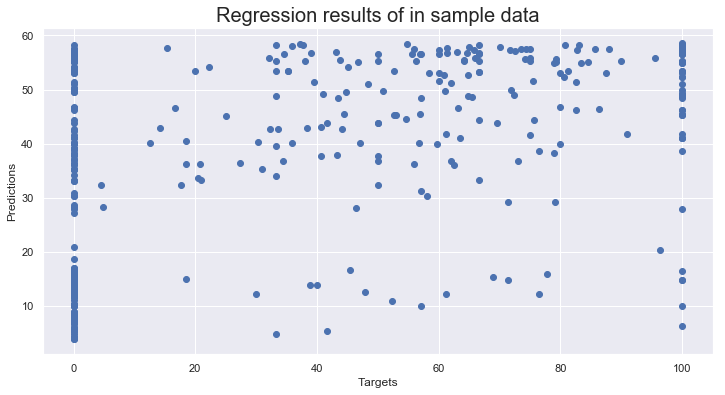

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_hat)
plt.xlabel('Targets',size=12)
plt.ylabel('Predictions',size=12)
plt.title('Regression results of in sample data',size=20)
plt.show()

As we can see the results are not looking very promising, with little correlation been seen and lots of clustering at the edges. Lets us now test it on the Validation sample of our data. 

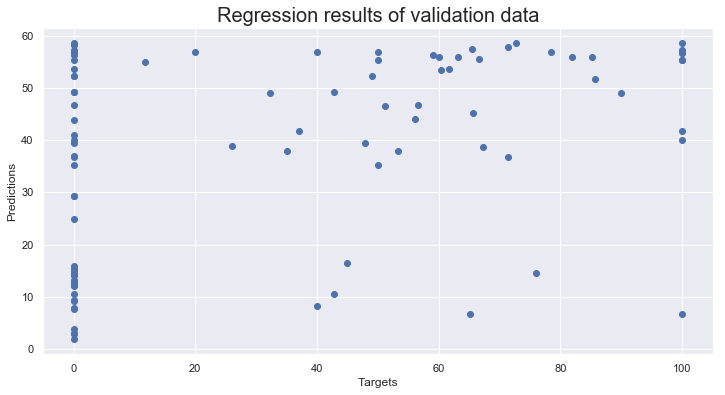

Out of sample Mean Squared Error: 1100.9629936779563


In [ ]:
#out sample test
y_test_hat=regressor.predict(x_test)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_hat)
plt.xlabel('Targets',size=12)
plt.ylabel('Predictions',size=12)
plt.title('Regression results of validation data',size=20)
plt.show()

print('Out of sample Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_hat))

The Data is as well predicted as the training data which is good, and it has very similar MSE(even better), so the model is good in the sense that it does not overfit. However its is not a very good predicted overall shown by lack of correlation in the graphs.

The following code tests the model on the out of sample data provided. Showing graph and results.

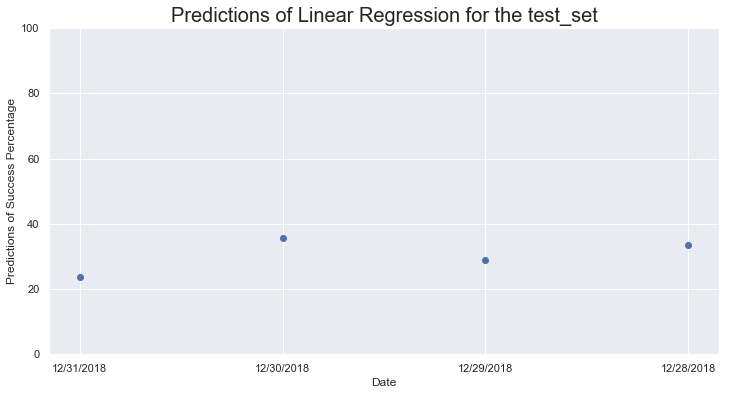

12/31/2018 23.57124227550266 %
12/30/2018 35.744637677861185 %
12/29/2018 29.010033344023643 %
12/28/2018 33.49111512620169 %


In [ ]:
#predicts the data
x_out_test=test_data[['Temperature AVG','Relative Humidity AVG','Wind Speed Daily AVG','Solar Radiation AVG' ]]
x_date=test_data['Date']
y_out_test_hat=regressor.predict(x_out_test)

#plots a scatter graph
plt.figure(figsize=(12, 6))
plt.scatter(x_date, y_out_test_hat)

plt.xlabel('Date',size=12)
plt.ylabel('Predictions of Success Percentage',size=12)
plt.ylim(0,100)
plt.title('Predictions of Linear Regression for the test_set',size=20)
plt.show()

#prints out prediction
print('12/31/2018',y_out_test_hat[0],'%' )
print('12/30/2018',y_out_test_hat[1],'%' )
print('12/29/2018',y_out_test_hat[2],'%' )
print('12/28/2018',y_out_test_hat[3],'%' )

Intrestingly it produces pretty the same result for the 4 days (between 25% and 35%), but the weather does change a lot day to day which suggests to me that the model, is not very predicting very well. Also the fact model is predicting climbs for "december" means it probably won't perform very well, as there was little training data in this region. 

### 2.1.2. Ridge regression

The following code finds the best penalty parameter for the ridge regression, by finding the prediction with the least MSE. 

In [ ]:
from sklearn import linear_model
alpha_good=0.5
reg = linear_model.Ridge(alpha=0.5)
reg.fit(x_train,y_train)
y_train_hat=reg.predict(x_train)
w_old=metrics.mean_squared_error(y_train, y_train_hat)
for x in range(10000):
    reg = linear_model.Ridge(alpha=x*0.0001)
    reg.fit(x_train,y_train)
    y_train_hat=reg.predict(x_train)
    w= metrics.mean_squared_error(y_train, y_train_hat)
    if w<w_old:
        alpha_good=x*0.001
        w_old=w
for x in range(50):
    reg = linear_model.Ridge(alpha=(10**(x-20)))
    reg.fit(x_train,y_train)
    y_train_hat=reg.predict(x_train)
    w= metrics.mean_squared_error(y_train, y_train_hat)
    if w<w_old:
        alpha_good=10**(x-15)
        w_old=w
best_alpha_reg = linear_model.Ridge(alpha=alpha_good)
best_alpha_reg.fit(x_train,y_train)
y_train_hat_rid=best_alpha_reg.predict(x_train)
print('In of sample Mean Squared Error:', w_old)
print('Best Alpha:',alpha_good)

In of sample Mean Squared Error: 1131.4747892895264
Best Alpha: 0.0


The ridge regression is no better then the linear regression, with the training data, since if you compare MSE they are identical with a value of 1123.904577603364. But to confirm lets look at the graphs.

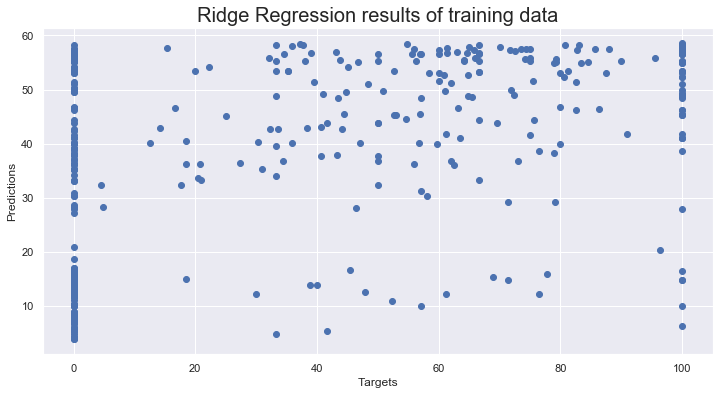

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_train,y_train_hat_rid)
plt.xlabel('Targets',size=12)
plt.ylabel('Predictions',size=12)
plt.title('Ridge Regression results of training data',size=20)
plt.show()

It appears to be very similar to the Linear Regression. Let us investigate further on the validation set.

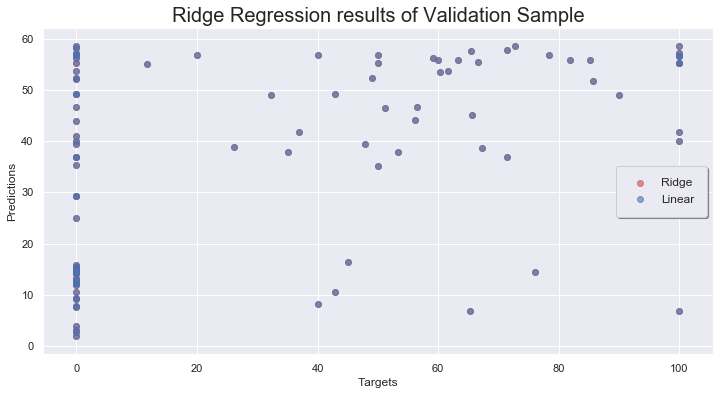

Out of sample Mean Squared Error: 1100.9629936779565


In [ ]:
# validation test
rid_y_test_hat=best_alpha_reg.predict(x_test)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, rid_y_test_hat,color='r', alpha=0.6,label="Ridge")
plt.scatter(y_test, y_test_hat,color='b', alpha=0.6,label="Linear")
plt.xlabel('Targets',size=12)
plt.ylabel('Predictions',size=12)
plt.legend(fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Ridge Regression results of Validation Sample',size=20)
plt.show()

print('Out of sample Mean Squared Error:', metrics.mean_squared_error(y_test, rid_y_test_hat))

Both models do seem to be yielding similar results. The graph below shows the difference in predictions.

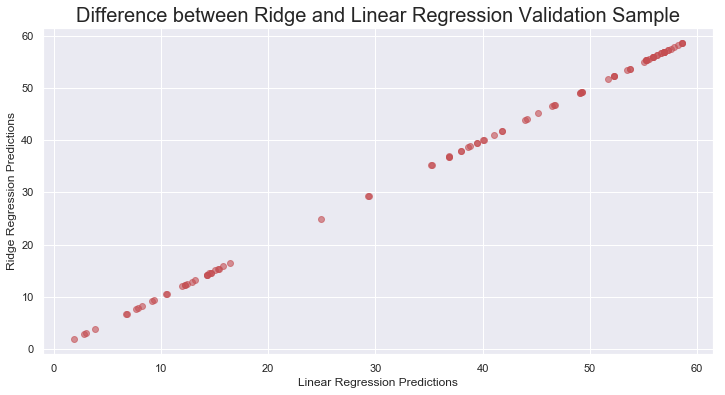

Mean Squared Error between model predictions on Validation Set: 5.516006082270396e-29


In [ ]:
#code to produce graph below
plt.figure(figsize=(12, 6))
plt.scatter(y_test_hat, rid_y_test_hat,color='r', alpha=0.6,label="Ridge")
plt.xlabel('Linear Regression Predictions',size=12)
plt.ylabel('Ridge Regression Predictions',size=12)
plt.title('Difference between Ridge and Linear Regression Validation Sample',size=20)
plt.show()

print('Mean Squared Error between model predictions on Validation Set:', metrics.mean_squared_error(y_test_hat, rid_y_test_hat))

As we can see there is a general positive correlation, which suggests both models predict similar behaviours of the data. The MSE is also relatively low (approximately a tenth of the actual error of training data), which suggests the Ridge model will not produce results which will be much better/that different to Linear Model.

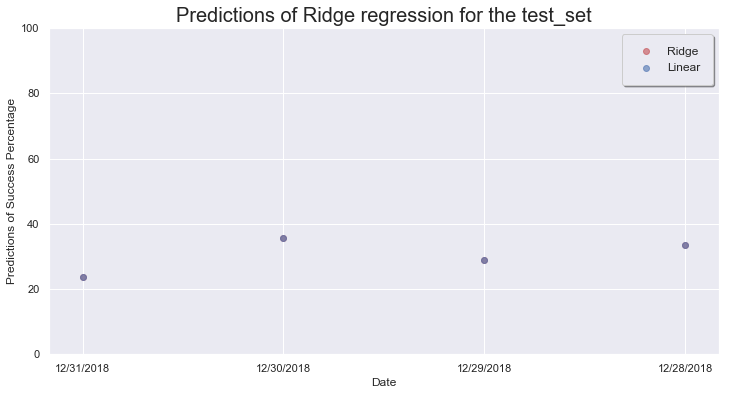

12/31/2018 23.571242275502655 %
12/30/2018 35.74463767786119 %
12/29/2018 29.010033344023636 %
12/28/2018 33.49111512620169 %
difference of results
12/31/2018 3.552713678800501e-15 %
12/30/2018 -7.105427357601002e-15 %
12/29/2018 7.105427357601002e-15 %
12/28/2018 0.0 %


In [ ]:
#out sample test
rid_y_out_test_hat=best_alpha_reg.predict(x_out_test)


#plots a scatter graph
plt.figure(figsize=(12, 6))
plt.scatter(x_date, rid_y_out_test_hat,color='r', alpha=0.6,label="Ridge")
plt.scatter(x_date, y_out_test_hat,color='b', alpha=0.6,label="Linear")

plt.xlabel('Date',size=12)
plt.ylabel('Predictions of Success Percentage',size=12)
plt.ylim(0,100)
plt.legend(fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Predictions of Ridge regression for the test_set',size=20)
plt.show()

#prints out prediction
print('12/31/2018',rid_y_out_test_hat[0],'%' )
print('12/30/2018',rid_y_out_test_hat[1],'%' )
print('12/29/2018',rid_y_out_test_hat[2],'%' )
print('12/28/2018',rid_y_out_test_hat[3],'%' )

print('difference of results')

print('12/31/2018',y_out_test_hat[0]-rid_y_out_test_hat[0],'%' )
print('12/30/2018',y_out_test_hat[1]-rid_y_out_test_hat[1],'%' )
print('12/29/2018',y_out_test_hat[2]-rid_y_out_test_hat[2],'%' )
print('12/28/2018',y_out_test_hat[3]-rid_y_out_test_hat[3],'%' )

Again these results reinforce the conclusions from the previous graph that Ridge Model will not give results which are drastically different, in this case the predictions they differ by magnitude of 10 to the -15, which is minute. This could be due to the fact both models are predicting climbs for "december" where there is little training data in this region. So both are predicting outliers so will not perform very well, giving similar results. 


### 2.1.3. Discussion

Again same results as before, aprroximately same MSE and plots. The reason for this is that altering alpha (the Ridge penalty parameter) increases the smoothness of the fit. But as we can see the data is not very well correlated and the fits themselves are not very good. With the model being very hit an miss. So changing the smoothness of the fit will very little impact on the actual result, hence the lack of improvement with Ridge. Which is why the Ridge regression is the same as the linear. On the plus side both models do not overfit.     

### 2.2 Classification 

Here I just reindex the data, dropping data which is not needed.

In [ ]:
cat_data_time=final_data_time.reindex()
cat_data_time = cat_data_time.drop(['Temperature AVG','Relative Humidity AVG','Wind Speed Daily AVG','Solar Radiation AVG','Success Percentage','Wind Direction AVG'],axis=1)
print(cat_data_time.head())

                        Route       Date  Attempted  Succeeded
0   Curtis RIngraham Directge 2015-05-29          2          0
1      Disappointment Cleaver 2015-05-29         63         40
2             Fuhrer's Finger 2015-05-29          2          2
3               Kautz Glacier 2015-05-29          2          2
4  Liberty RIngraham Directge 2015-05-29          4          0


Here I iterate over the rows appending data to the data set if the 'attempted' is greater then one, at the end I drop all data with 'attempted' greater than 1, making the attemped and succed column effectively zero. 

In [ ]:
#iterating over the dataframe
for x in range(len(cat_data_time)):
    if cat_data_time.iloc[x]['Attempted']>1:
        #append sucesseful attempts
        for y1 in range(cat_data_time.iloc[x]['Succeeded']):
            cat_data_time=cat_data_time.append( {"Route":cat_data_time.iloc[x]['Route'],'Date':cat_data_time.iloc[x]['Date'],'Attempted':1,'Succeeded':1},ignore_index=True)
        #appends unsuccessful attempts
        for y2 in range(cat_data_time.iloc[x]['Attempted']-cat_data_time.iloc[x]['Succeeded']):
            cat_data_time=cat_data_time.append( {"Route":cat_data_time.iloc[x]['Route'],'Date':cat_data_time.iloc[x]['Date'],'Attempted':1,'Succeeded':0},ignore_index=True)
#droping all data with attempts greater then one
cat_data_time_fin = cat_data_time[cat_data_time['Attempted']<=1]

Here are the results, the code is a bit slow, so there is probably a more efficent way to do this using built in functions, howver it produces the desired results.

In [ ]:
print(cat_data_time_fin)

                                  Route       Date  Attempted  Succeeded
20               Disappointment Cleaver 2014-10-04          1          1
22               Disappointment Cleaver 2014-10-06          1          0
59                        Little Tahoma 2015-05-14          1          0
64     glacier only - no summit attempt 2015-05-17          1          0
103                       Kautz Glacier 2015-05-28          1          0
141                       Kautz Glacier 2015-06-13          1          1
206    glacier only - no summit attempt 2015-06-26          1          0
263                       Kautz Cleaver 2015-07-11          1          0
404                     Emmons-Winthrop 2015-08-08          1          0
482           Curtis RIngraham Directge 2015-05-29          1          0
483           Curtis RIngraham Directge 2015-05-29          1          0
484              Disappointment Cleaver 2015-05-29          1          1
485              Disappointment Cleaver 2015-05-29 

Now we remerge the data to get the weather conditions for a given date, making sure rain data's 'date' column is of the same format (python date time).   

In [ ]:
rain_2=rain_1
rain_2['Date'] = pd.to_datetime(rain_2['Date'])
clean_cat_data=pd.merge(cat_data_time_fin, rain_2, on='Date')
print(clean_cat_data)

                                  Route       Date  Attempted  Succeeded  \
0                Disappointment Cleaver 2014-10-04          1          1   
1                         Kautz Glacier 2014-10-04          1          0   
2                         Kautz Glacier 2014-10-04          1          0   
3                Disappointment Cleaver 2014-10-06          1          0   
4                         Little Tahoma 2015-05-14          1          0   
5                Disappointment Cleaver 2015-05-14          1          0   
6                Disappointment Cleaver 2015-05-14          1          0   
7                Disappointment Cleaver 2015-05-14          1          0   
8                Disappointment Cleaver 2015-05-14          1          0   
9                Disappointment Cleaver 2015-05-14          1          0   
10               Disappointment Cleaver 2015-05-14          1          0   
11               Disappointment Cleaver 2015-05-14          1          0   
12          

As we can see the data has been successfully categorised, with the 'succeeded' column being the binary variable.  

### 2.2.2 Logistic regression

Need to split the data into training and validaition set, the code below indictates the validation set size (approx 20%).

In [ ]:
print(len(clean_cat_data)*0.2)

2026.2


So a validation set of  size of 2026 is needed. Code produces Validation and Training sets. 

In [ ]:
clean_cat_data_train,clean_cat_data_val_data=samplesplitter(clean_cat_data,2026)
clean_cat_data_val_data.head()

,Route,Date,Attempted,Succeeded,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solar Radiation AVG
6,Disappointment Cleaver,2015-05-14,1,0,26.23875,83.000833,2.066375,154.61875,10.032417
7,Disappointment Cleaver,2015-05-14,1,0,26.23875,83.000833,2.066375,154.61875,10.032417
9,Disappointment Cleaver,2015-05-14,1,0,26.23875,83.000833,2.066375,154.61875,10.032417
13,Disappointment Cleaver,2015-05-14,1,0,26.23875,83.000833,2.066375,154.61875,10.032417
14,Disappointment Cleaver,2015-05-14,1,0,26.23875,83.000833,2.066375,154.61875,10.032417


In [ ]:
x_cat_train=clean_cat_data_train[['Temperature AVG','Relative Humidity AVG','Wind Speed Daily AVG','Solar Radiation AVG' ]]
x_cat_test=clean_cat_data_val_data[['Temperature AVG','Relative Humidity AVG','Wind Speed Daily AVG','Solar Radiation AVG' ]]
y_cat_train=clean_cat_data_train['Succeeded']
y_cat_test=clean_cat_data_val_data['Succeeded']

We now have the data needed to perform the logistic regression. The following code creates a logistic regression.

In [ ]:
#uses a linear fitter
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_cat_train, y_cat_train)

#predicts the training model
y_cat_train_hat=logreg.predict(x_cat_train)

#shows all different errors using different metrics
print('Mean Squared Error of training data:', metrics.mean_squared_error(y_cat_train_hat, y_cat_train))
print('Mean Squared Log Error of training data:', metrics.mean_squared_log_error( y_cat_train,y_cat_train_hat))
print('Log loss of training data:', metrics.log_loss(y_cat_train,y_cat_train_hat))
print('R^2 (coefficient of determination) of training data:', metrics.r2_score( y_cat_train, y_cat_train_hat))

Mean Squared Error of training data: 0.3945712523133868
Mean Squared Log Error of training data: 0.18957294737944577
Log loss of training data: 13.62819885665139
R^2 (coefficient of determination) of training data: -0.5807645497992435


The following code predicts the outcomes for Validation set and the associated probility of a climb being successful. 

In [ ]:
y_cat_test_hat=logreg.predict(x_cat_test)
valid_prob_success=logreg.predict_proba(x_cat_test)[:,1]
print(valid_prob_success)
print('Mean Squared Error of Validation data:', metrics.mean_squared_error(y_cat_test_hat, y_cat_test))
print('Mean Squared Log Error of Validation data:', metrics.mean_squared_log_error( y_cat_test,y_cat_test_hat))
print('Log loss of Validation data:', metrics.log_loss(y_cat_test,y_cat_test_hat))
print('R^2 (coefficient of determination) of Validation data:', metrics.r2_score( y_cat_test, y_cat_test_hat))

[0.2642376  0.2642376  0.2642376  ... 0.22671929 0.22671929 0.22671929]
Mean Squared Error of Validation data: 0.395360315893386
Mean Squared Log Error of Validation data: 0.1899520553546295
Log loss of Validation data: 13.655449802713553
R^2 (coefficient of determination) of Validation data: -0.5844304957953901


As expected the MSE and MSLE are slightly bigger then for the training data, but not of a different order of magnitude, so the data has not been overfitted. The R^2 (coefficient of determination) being negative means it is uninformative and is fitted well by horizontal line in the context of the test.

The following code produces the probabilities graph to visually confirm the Logistic Model to be working.

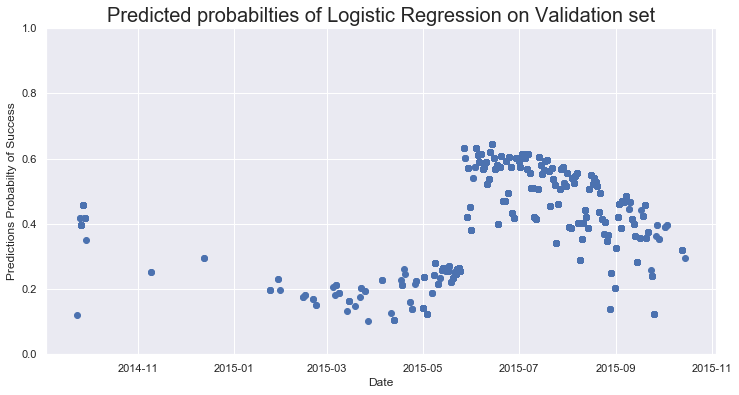

In [ ]:
#create time data
x_date_cat=clean_cat_data_val_data['Date']

#creates graph
plt.figure(figsize=(12, 6))
plt.plot_date(x_date_cat,valid_prob_success)

plt.xlabel('Date',size=12)
plt.ylabel('Predictions Probabilty of Success',size=12)
plt.ylim(0,1)
plt.title('Predicted probabilties of Logistic Regression on Validation set',size=20)
plt.show()

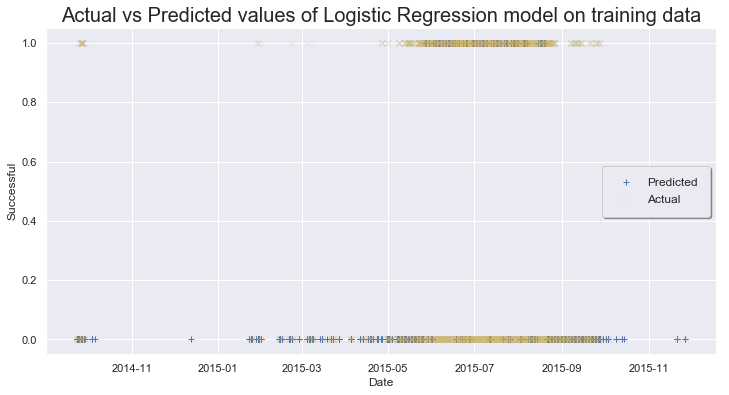

In [ ]:
#create time data
x_date_cat2=clean_cat_data_train['Date']

#creates graph
plt.figure(figsize=(12, 6))
plt.plot_date(x_date_cat2,y_cat_train_hat, color='b', alpha=1.0,label="Predicted",marker="+")
plt.plot_date(x_date_cat2,y_cat_train,color='y', alpha=0.05,label="Actual",marker="x")
plt.xlabel('Date',size=12)
plt.ylabel('Successful',size=12)
plt.title('Actual vs Predicted values of Logistic Regression model on training data',size=20)
plt.legend(loc="center right",fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

From the graph we can see predicted values are more spread out then Actual, but it still seem to reasonably predicting a majority of the data. Also we can note that error does not change from the training to the validation data, o it has not been overfitted.   

### 2.2.3. Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_cat_train, y_cat_train)
y_pred = gnb.predict(x_cat_train)

#shows all different errors using different metrics
print('Mean Squared Error of training data:', metrics.mean_squared_error(y_pred, y_cat_train))
print('Mean Squared Log Error of training data:', metrics.mean_squared_log_error( y_cat_train,y_pred))
print('Log loss of training data:', metrics.log_loss(y_cat_train,y_pred))
print('R^2 (coefficient of determination) of training data:', metrics.r2_score(y_cat_train,y_pred))

Mean Squared Error of training data: 0.4217149907464528
Mean Squared Log Error of training data: 0.2026142383186197
Log loss of training data: 14.565774395900315
R^2 (coefficient of determination) of training data: -0.689510078553413


We are getting the similar error results to logistic regression which is promising. With R^2 being neagtive and so useless. The code below predicts the outcomes on the validation set. 

In [ ]:
y_pred2 = gnb.predict(x_cat_test)
valid_prob_success_gnb=gnb.predict_proba(x_cat_test)[:,1]
#shows all different errors using different metrics
print('Mean Squared Error of training data:', metrics.mean_squared_error(y_pred2, y_cat_test))
print('Mean Squared Log Error of training data:', metrics.mean_squared_log_error( y_cat_test,y_pred2))
print('Log loss of training data:', metrics.log_loss(y_cat_test,y_pred2))

Mean Squared Error of training data: 0.4422507403751234
Mean Squared Log Error of training data: 0.21248070112078404
Log loss of training data: 15.275064649216713


The following code, prints the predicted probabily of a success of the validation data.

In [ ]:
print(valid_prob_success_gnb)

[0.02125183 0.02125183 0.02125183 ... 0.00109821 0.00109821 0.00109821]


The following code produces the graph so we can confirm what is happening.

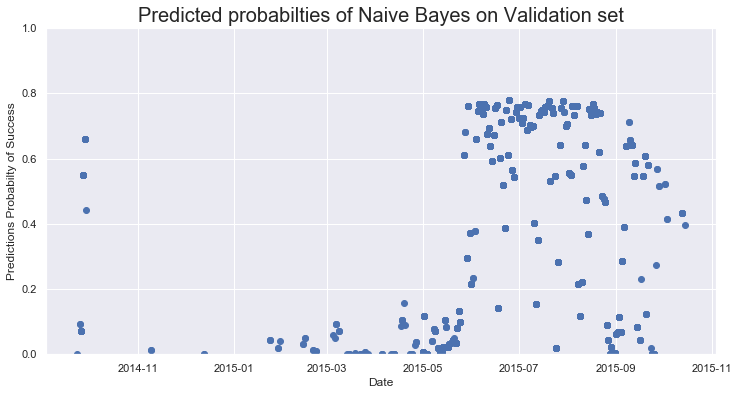

In [ ]:
#create time data
x_date_cat3=clean_cat_data_val_data['Date']

#creates graph
plt.figure(figsize=(12, 6))
plt.plot_date(x_date_cat3,valid_prob_success_gnb)

plt.xlabel('Date',size=12)
plt.ylabel('Predictions Probabilty of Success',size=12)
plt.ylim(0,1)
plt.title('Predicted probabilties of Naive Bayes on Validation set',size=20)
plt.show()

This model gives us a less smooth spread of outcomes, compared to logistic regression. It is more similar to the data we actually may get. The code below shows us how the predicted data actually compares.

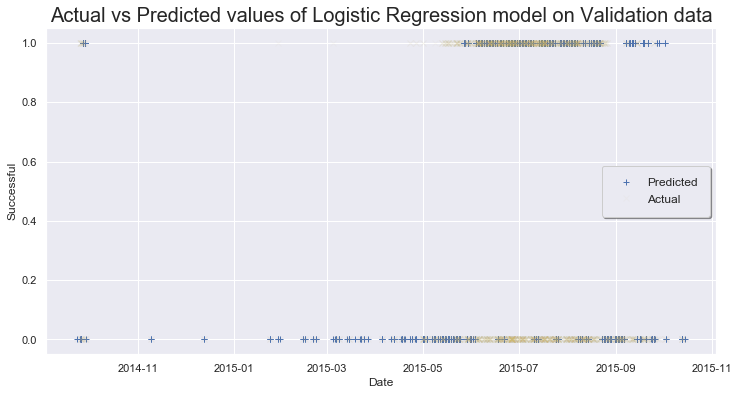

In [ ]:
#create time data
x_date_cat4=clean_cat_data_val_data['Date']

#creates graph
plt.figure(figsize=(12, 6))
plt.plot_date(x_date_cat4,y_pred2, color='b', alpha=1.0,label="Predicted",marker="+")
plt.plot_date(x_date_cat4,y_cat_test,color='y', alpha=0.05,label="Actual",marker="x")
plt.xlabel('Date',size=12)
plt.ylabel('Successful',size=12)
plt.title('Actual vs Predicted values of Logistic Regression model on Validation data',size=20)
plt.legend(loc="center right",fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

As we can see the errors do not really change from training set to validation set. So the data has not been overfitted. But as we can seee from the above graph the fit is not very good with blue being far more spread out then the yellow, suggesting it is not a very good model in general. Which has been the general trend throughout this coursework.  